In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
url='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [3]:
data=pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data[data['Survived']==1]['PassengerId'].count()

342

In [5]:
data[data['Survived']==1]['PassengerId'].count()/data.shape[0]*100

38.38383838383838

In [6]:
import seaborn as sns

In [7]:
data['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [8]:
data[data['Survived']==1]['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [9]:
data[data['Survived']==1]['Sex'].value_counts(normalize=True)*100

Sex
female    68.128655
male      31.871345
Name: proportion, dtype: float64

In [10]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

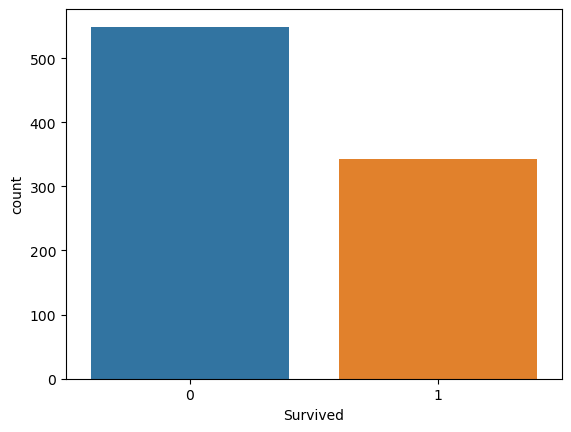

In [11]:
sns.countplot(x=data['Survived'])

In [12]:
data['Age'].agg([min,max])

min     0.42
max    80.00
Name: Age, dtype: float64

In [13]:
#distrubution=counts

In [14]:
def ages(x):
    if x<20:
        return '0-20'
    elif x>20 and x<=40:
        return '20-40'
    elif x>40 and x<=60:
        return '40-60'
    else:
        return '60-80'

In [15]:
data['age_group']=data['Age'].apply(ages)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,20-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,20-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,20-40


In [16]:
data['age_group'].value_counts()

age_group
20-40    385
60-80    214
0-20     164
40-60    128
Name: count, dtype: int64

In [17]:
data['age_group'].value_counts(normalize=True)*100

age_group
20-40    43.209877
60-80    24.017957
0-20     18.406285
40-60    14.365881
Name: proportion, dtype: float64

<Axes: xlabel='age_group', ylabel='count'>

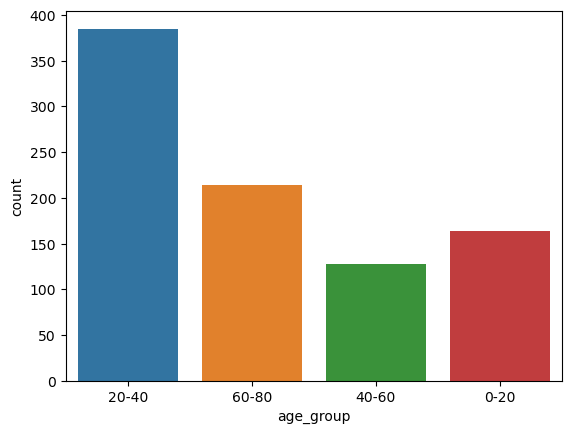

In [18]:
sns.countplot(x=data['age_group'])

In [19]:
import matplotlib.pyplot as plt

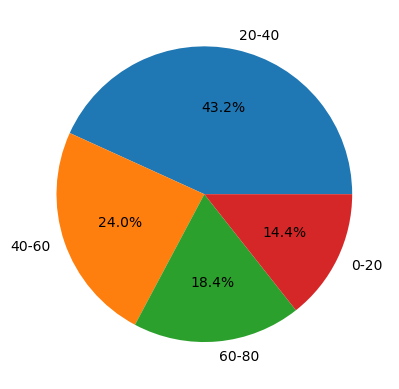

In [20]:
plt.pie(data['age_group'].value_counts(normalize=True)*100,labels=['20-40','40-60','60-80','0-20'],autopct='%1.1f%%')
plt.show()

In [21]:
data.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [22]:
data.groupby(['Pclass'])['Survived'].value_counts(normalize=True)*100

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64

In [23]:
data['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [24]:
def fares(x):
    if x<120:
        return '0-120'
    elif x>120 and x<240:
        return '120-240'
    elif x>240 and x<360:
        return '240-360'
    elif x>360 and x<480:
        return '360-480'
    else:
        return '480-600'

In [25]:
data['fare_group']=data['Fare'].apply(fares)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-40,0-120
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,20-40,0-120
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40,0-120
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,20-40,0-120
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,20-40,0-120


In [26]:
data['fare_group'].value_counts()

fare_group
0-120      849
120-240     27
240-360      8
480-600      7
Name: count, dtype: int64

In [27]:
data.groupby(['Embarked'])['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [28]:
data[data['Survived']==1].groupby(['Embarked'])['PassengerId'].count()

Embarked
C     93
Q     30
S    217
Name: PassengerId, dtype: int64

In [29]:
data['Fam']=data['SibSp']+data['Parch']+1

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,fare_group,Fam
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-40,0-120,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,20-40,0-120,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40,0-120,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,20-40,0-120,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,20-40,0-120,1


<Axes: xlabel='Fam', ylabel='count'>

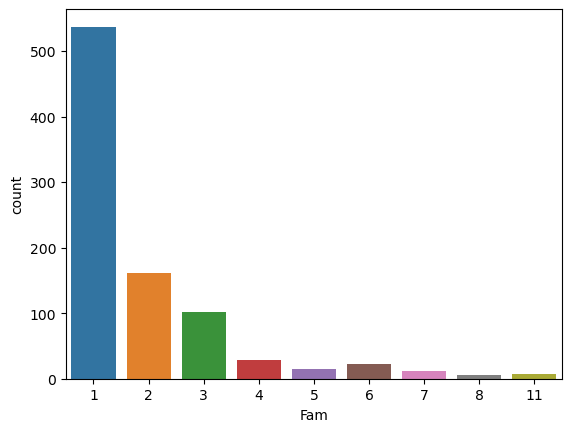

In [31]:
sns.countplot(x=data['Fam'])

In [32]:
data[data['Survived']==1].groupby(['Fam'])['PassengerId'].count()

Fam
1    163
2     89
3     59
4     21
5      3
6      3
7      4
Name: PassengerId, dtype: int64

In [33]:
data[data['Survived']==1].groupby(['SibSp'])['PassengerId'].count()

SibSp
0    210
1    112
2     13
3      4
4      3
Name: PassengerId, dtype: int64

In [34]:
data[data['Survived']==1].groupby(['Parch'])['PassengerId'].count()

Parch
0    233
1     65
2     40
3      3
5      1
Name: PassengerId, dtype: int64

In [35]:
data[data['Survived']==1].groupby(['Pclass'])['PassengerId'].count() 

Pclass
1    136
2     87
3    119
Name: PassengerId, dtype: int64

<Axes: xlabel='PassengerId', ylabel='count'>

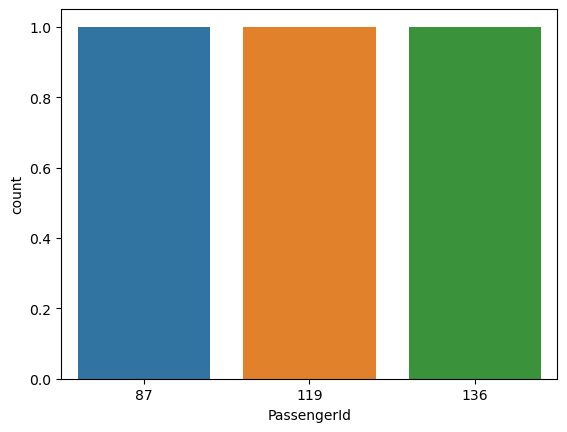

In [36]:
sns.countplot(x=data[data['Survived']==1].groupby(['Pclass'])['PassengerId'].count())

In [37]:
data['Name'].str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [38]:
data[['last','first']]=data['Name'].str.split(',',expand=True)

In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,fare_group,Fam,last,first
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-40,0-120,2,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,20-40,0-120,2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40,0-120,1,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,20-40,0-120,2,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,20-40,0-120,1,Allen,Mr. William Henry


In [42]:
data['title']=np.NaN
for i in range(len(data)):
    data['title'].iloc[i]=data['first'].str.split('. ').iloc[i][0]

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,fare_group,Fam,last,first,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-40,0-120,2,Braund,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,20-40,0-120,2,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40,0-120,1,Heikkinen,Miss. Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,20-40,0-120,2,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,20-40,0-120,1,Allen,Mr. William Henry,Mr


In [ ]:
data.head()

In [44]:
data['title'].value_counts()

title
 Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Mlle          2
 Major         2
 Col           2
 th            1
 Capt          1
 Ms            1
 Sir           1
 Lady          1
 Mme           1
 Don           1
 Jonkheer      1
Name: count, dtype: int64

In [47]:
from scipy.stats import pointbiserialr

In [48]:
corr=pointbiserialr(data['title'],data['Survived'])

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [50]:
data.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [51]:
data.groupby(['Pclass'])['Sex'].value_counts(normalize=True)*100

Pclass  Sex   
1       male      56.481481
        female    43.518519
2       male      58.695652
        female    41.304348
3       male      70.672098
        female    29.327902
Name: proportion, dtype: float64

In [53]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_group        0
fare_group       0
Fam              0
last             0
first            0
title            0
dtype: int64